<a href="https://colab.research.google.com/github/prijal-matc/takeovds41/blob/main/Time_Series_Analysis_(Capstone_project)_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tesla Stock Price Prediction**

In [ ]:
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38616 sha256=6c1f047c7e31a54c91d36b011823d896eac638243d04519205931e44e44ba1a1
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
tesla_df = yf.download('TSLA', '2010-01-01', '2024-01-31')
tesla_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
tesla_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-24,211.880005,212.729996,206.770004,207.830002,207.830002,123369900
2024-01-25,189.699997,193.000000,180.059998,182.630005,182.630005,198076800
2024-01-26,185.500000,186.779999,182.100006,183.250000,183.250000,107343200
2024-01-29,185.630005,191.479996,183.669998,190.929993,190.929993,125013100
2024-01-30,195.330002,196.360001,190.610001,191.589996,191.589996,109982300


In [ ]:
tesla_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-01-24,211.880005,212.729996,206.770004,207.830002,207.830002,123369900
2024-01-25,189.699997,193.000000,180.059998,182.630005,182.630005,198076800
2024-01-26,185.500000,186.779999,182.100006,183.250000,183.250000,107343200


***General Analysis***

The dataset contains 3,420 entries with 6 columns, it's a time series of financial data from 2010-06-29 to 2024-01-30. The data set includes below columns:

**Open**: The opening price of the stock for the day.

**High**: The highest price of the stock during the day.

**Low:** The lowest price of the stock during the day.

**Close:** The closing price of the stock for the day.

**Adj Close:** The adjusted closing price, which accounts for any actions such as stock splits.

**Volume:** The number of shares traded during the day.



In [ ]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3420 entries, 2010-06-29 to 2024-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3420 non-null   float64
 1   High       3420 non-null   float64
 2   Low        3420 non-null   float64
 3   Close      3420 non-null   float64
 4   Adj Close  3420 non-null   float64
 5   Volume     3420 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 187.0 KB


In [ ]:
missing_values = tesla_df.isnull().sum()
missing_values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
duplicates = tesla_df.duplicated().sum()
duplicates

0

In [ ]:
tesla_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3.420000e+03
mean,71.362333,72.923937,69.672555,71.334465,71.334465,9.690065e+07
std,101.903277,104.158455,99.410967,101.814246,101.814246,7.984101e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,10.862833,11.165334,10.681667,10.931834,10.931834,4.619738e+07
50%,17.013333,17.261333,16.717000,16.994000,16.994000,8.159700e+07
75%,121.119167,124.217499,117.207500,123.157501,123.157501,1.232902e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


**Descriptive Analysis:**


*** Below are the summary statistics for the numerical features in the tesla_df:***




***Open:***



Mean: $71.36

Standard Deviation: $101.90

Minimum: $1.08

Maximum: $411.47


***High:***

Mean: $72.92

Standard Deviation: $104.16

Minimum: $1.11

Maximum: $414.50


***Low:***

Mean: $69.67

Standard Deviation: $99.41

Minimum: $1.00

Maximum: $405.67


***Close:***

Mean: $71.33

Standard Deviation: $101.81

Minimum: $1.05

Maximum: $409.97


***Adj Close***:

Mean: $71.33

Standard Deviation: $101.81

Minimum: $1.05

Maximum: $409.97


***Volume:***

Mean: 96,900,650

Standard Deviation: 79,841,010

Minimum: 1,777,500

Maximum: 914,082,000


***Open, High, Low, Close, Adj Close:***

Prices vary widely, with a mean around 71-72 but with a significant standard deviation (about 101-104), indicating high volatility over the period covered.

The minimum values are around 1, and the maximum values reach up to 414, suggesting substantial price appreciation over time.

***Volume:*** Trading volume also shows a wide range, from as low as about 1.78 million to as high as 914.08 million shares traded in a day, with a mean volume of approximately 96.90 million.

# **Data Analysis (EDA):**

Text(0.5, 1.0, 'Tesla Stock Price Over the Time')

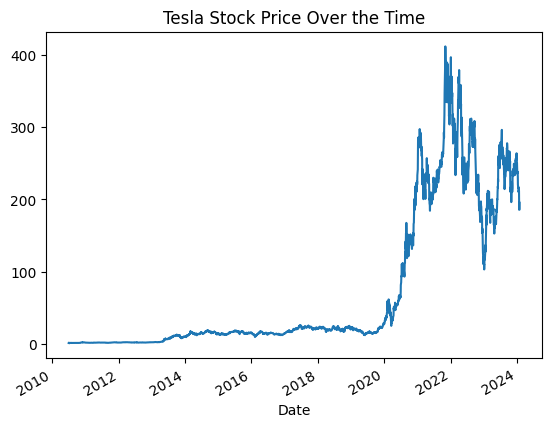

In [ ]:
tesla_df.Open.plot()
plt.title('Tesla Stock Price Over the Time')

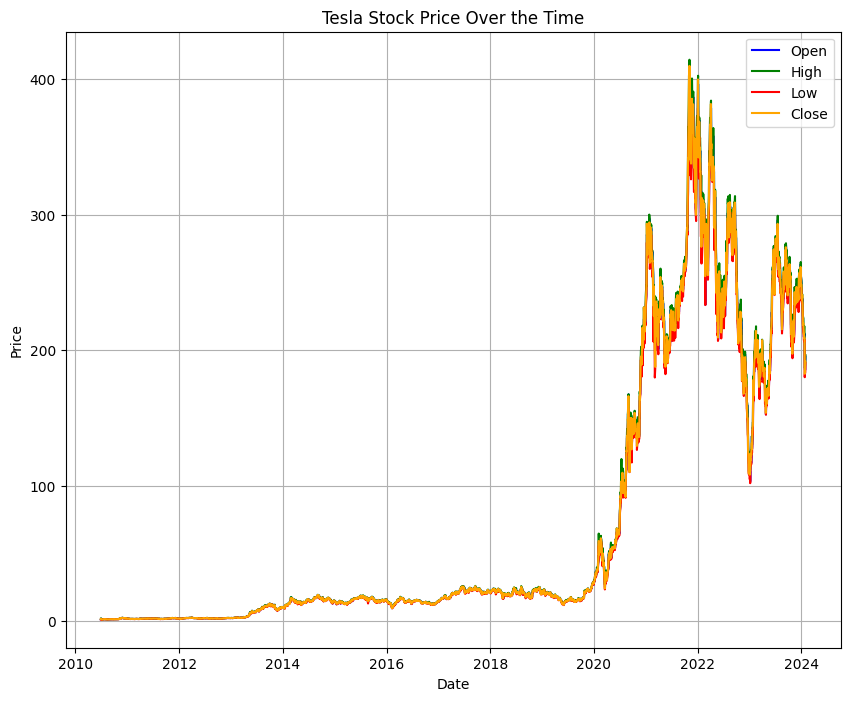

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(tesla_df.index, tesla_df['Open'], label='Open', color='blue')
plt.plot(tesla_df.index, tesla_df['High'], label='High', color='green')
plt.plot(tesla_df.index, tesla_df['Low'], label='Low', color='red')
plt.plot(tesla_df.index, tesla_df['Close'], label='Close', color='orange')

plt.title('Tesla Stock Price Over the Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

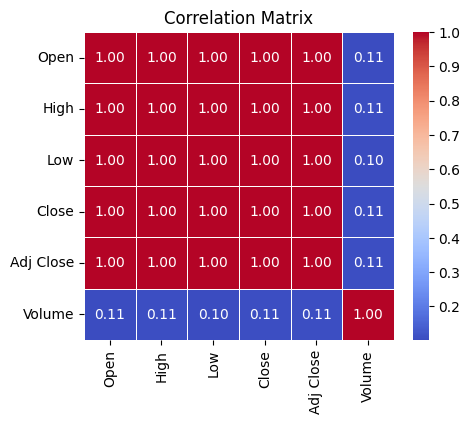

In [ ]:
import seaborn as sns
correlation_matrix = tesla_df.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

*`The correlation matrix heatmap above visualizes the relationships between numerical features in the Tesla stock market dataset:`*



*   Darker shades indicate stronger correlations, while lighter shades indicate weaker correlations
*   Features with a correlation coefficient close to 1 or -1 are highly correlated, while those close to 0 have weak correlations.
*   From the above correlation matrix heatmap, the 'Open', 'High', 'Low', and 'Close' prices are highly positively correlated with each other, as expected.
*   The 'Volume' feature shows relatively weak correlations with the price-related features


# **Summary of EDA Findings:**
The tesla stock dataset 'tesla_df' provided consists of financial data over a period from June 29, 2010, to January 30, 2024, with 'Date' used as the index. It contains six features: 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'.

The EDA process revealed no missing values or duplicates, indicating a clean dataset ready for analysis.

Descriptive statistics highlighted the dataset's central tendency and dispersion, with stock prices ranging significantly over time.

Visualizations through histograms and line plots provided insights into the distribution of stock prices and trading volume, as well as the overall trends and fluctuations in stock prices over the analyzed period.

Correlation analysis showed high positive correlations among the 'Open', 'High', 'Low', and 'Close' prices, while 'Volume' exhibited relatively weak correlations with these price indicators.